In [38]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import _california_housing
from sklearn.metrics import r2_score
housing_data = _california_housing.fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names''']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [39]:
print("dimension of housing data: {}".format(housing.shape))

dimension of housing data: (20640, 9)


In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [104]:
housesDf = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
housesDf['Target'] = housing_data.target
housesDf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


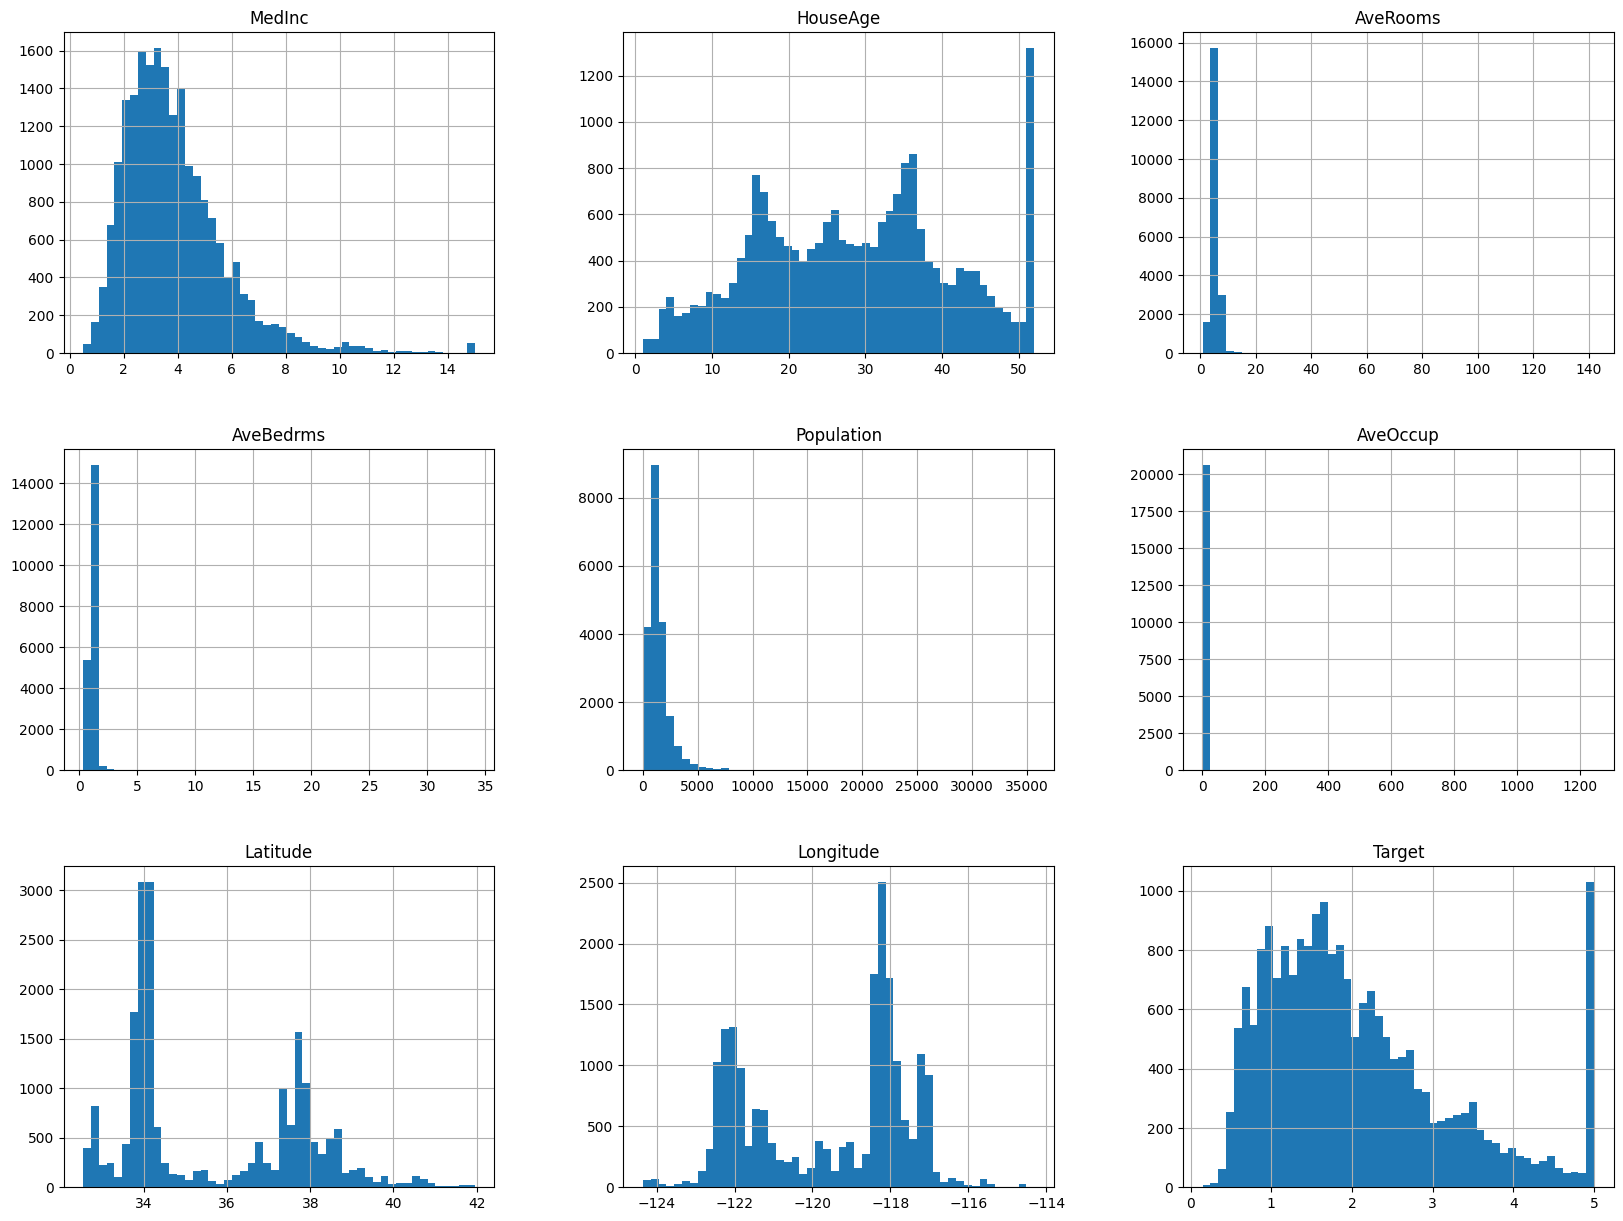

In [105]:
#Plotting histograms for various features
housesDf.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

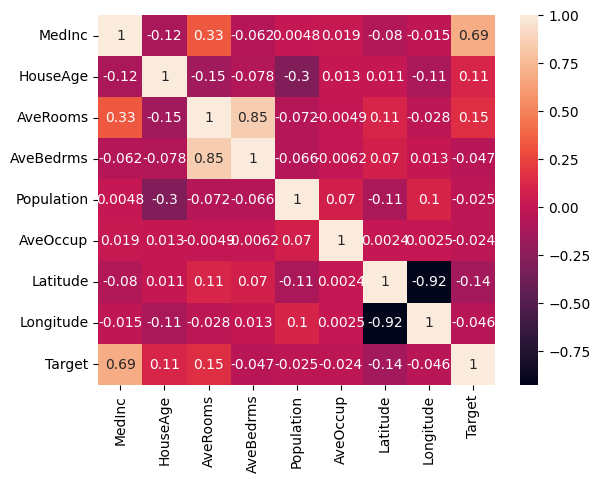

In [106]:
sb.heatmap(housesDf.corr(),annot=True)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(housing.loc[:, housing.columns != 'Target'], housing['Target'], random_state=69, test_size=0.2)
training_score = []
test_score = []

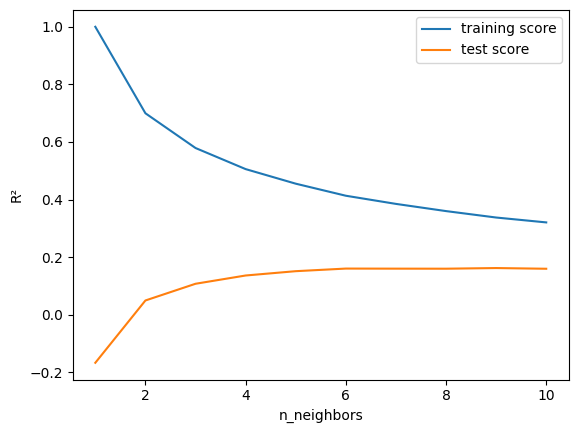

In [41]:
from sklearn.neighbors import KNeighborsRegressor
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 knn = KNeighborsRegressor(n_neighbors=n_neighbors)
 knn.fit(X_train, Y_train)

 # record training set score
 training_score.append(knn.score(X_train, Y_train))
 # record test set score
 test_score.append(knn.score(X_test, Y_test))
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel("R²")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [42]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)
k1 = knn.score(X_train, Y_train)
k2 = knn.score(X_test, Y_test)
print("R² of KNN Regressor on training set: {:.3f}".format(k1))
print("R² of KNN Regressor on test set: {:.3f}".format(k2))

R² of KNN Regressor on training set: 0.321
R² of KNN Regressor on test set: 0.160


In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
l1 = linreg.score(X_train, Y_train)
l2 = linreg.score(X_test, Y_test)
print("R² of Linear Regression on training set: {:.3f}".format(l1))
print("R² of Linear Regression on test set: {:.3f}".format(l2))

R² of Linear Regression on training set: 0.606
R² of Linear Regression on test set: 0.606


In [44]:
housing_features = [x for i,x in enumerate(housing.columns) if i!=8]
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=69)
tree.fit(X_train, Y_train)
t1 = tree.score(X_train, Y_train)
t2 = tree.score(X_test, Y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t2))

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.614


In [45]:
tree1 = DecisionTreeRegressor(max_depth=3, random_state=69)
tree1.fit(X_train, Y_train)
t3 = tree1.score(X_train, Y_train)
t4 = tree1.score(X_test, Y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t3))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t4))

R² of Decision Tree Regressor on training set: 0.537
R² of Decision Tree Regressor on test set: 0.526


In [46]:
print("Feature importances:\n{}".format(tree1.feature_importances_))

Feature importances:
[0.85134954 0.         0.02941436 0.         0.         0.1192361
 0.         0.        ]


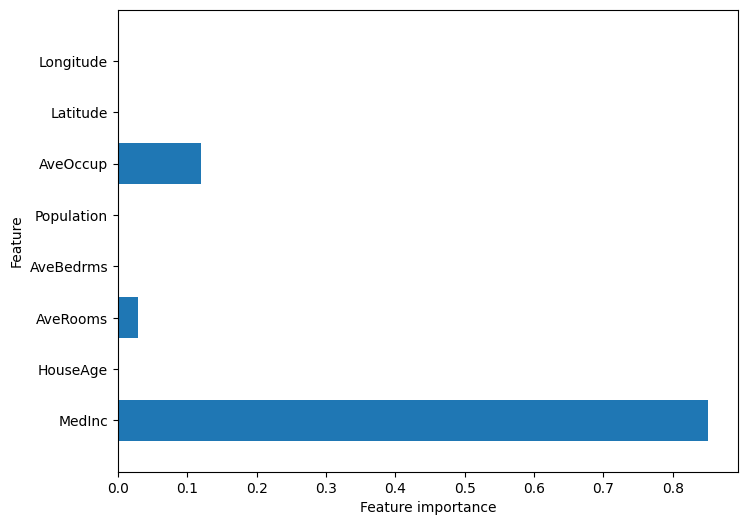

In [47]:
def plot_feature_importances_housing(model):
 plt.figure(figsize=(8,6))
 n_features = 8
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), housing_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances_housing(tree1)
plt.savefig('feature_importance')

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=69)
rf.fit(X_train, Y_train)
r1 = rf.score(X_train, Y_train)
r2 = rf.score(X_test, Y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r1))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r2))

R² of Random Forest Regressor on training set: 0.974
R² of Random Forest Regressor on test set: 0.808


In [49]:
rf1 = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=69)
rf1.fit(X_train, Y_train)
r3 = rf1.score(X_train, Y_train)
r4 = rf1.score(X_test, Y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r3))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r4))

R² of Random Forest Regressor on training set: 0.767
R² of Random Forest Regressor on test set: 0.723


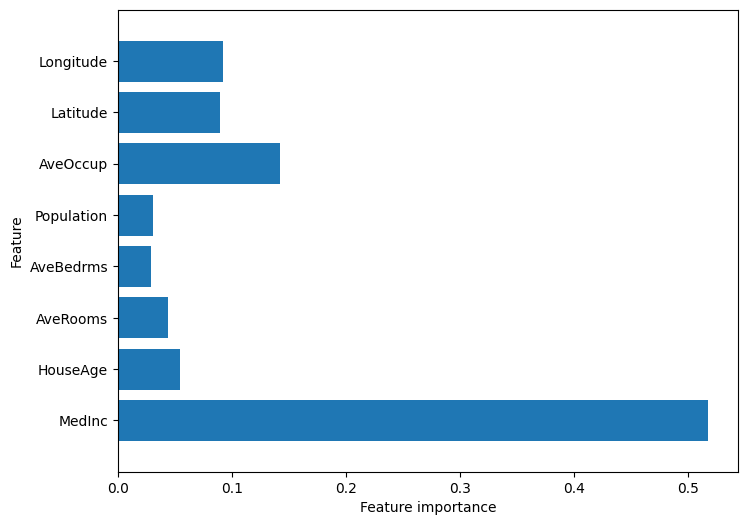

In [50]:
plot_feature_importances_housing(rf)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=69)
gb.fit(X_train, Y_train)
g1 = gb.score(X_train, Y_train)
g2 = gb.score(X_test, Y_test)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 0.806
R^2 of Gradient Boosting Regressor on test set: 0.778


In [52]:
gb1 = GradientBoostingRegressor(random_state=69, max_depth=4)
gb1.fit(X_train, Y_train)
g3 = gb1.score(X_train, Y_train)
g4 = gb1.score(X_test, Y_test)
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

R² of Gradient Boosting Regressor on training set: 0.841
R² of Gradient Boosting Regressor on test set: 0.801


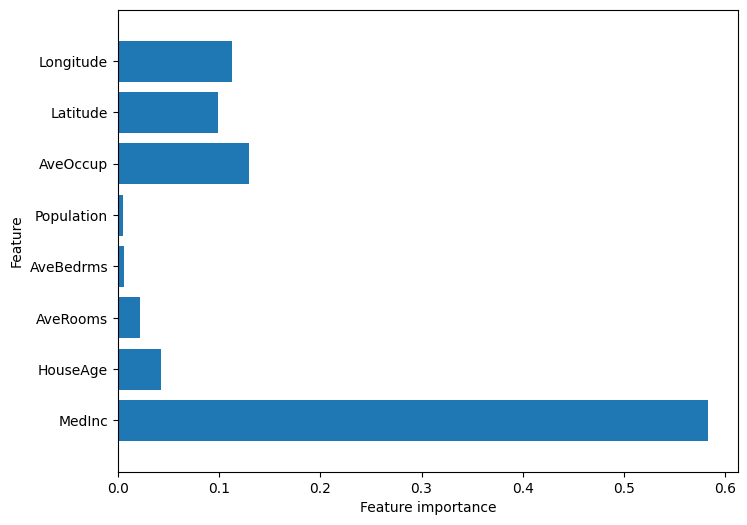

In [53]:
plot_feature_importances_housing(gb1)

In [54]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
s1 = svr.score(X_train, Y_train)
s2 = svr.score(X_test, Y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s1))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s2))

R² of Support Vector Regressor on training set: -0.021
R² of Support Vector Regressor on test set: -0.026


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svr1 = SVR()
svr1.fit(X_train_scaled, Y_train)
s3 = svr1.score(X_train_scaled, Y_train)
s4 = svr1.score(X_test_scaled, Y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s3))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s4))

R² of Support Vector Regressor on training set: 0.659
R² of Support Vector Regressor on test set: 0.670


In [56]:
svr2 = SVR(gamma=10)
svr2.fit(X_train_scaled, Y_train)
s5 = svr2.score(X_train_scaled, Y_train)
s6 = svr2.score(X_test_scaled, Y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s5))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s6))

R² of Support Vector Regressor on training set: 0.698
R² of Support Vector Regressor on test set: 0.701


In [57]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=69)
mlp.fit(X_train, Y_train)
m1 = mlp.score(X_train, Y_train)
m2 = mlp.score(X_test, Y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m1))
print("R² of MLP Regressor on test set: {:.3f}".format(m2))

R² of MLP Regressor on training set: 0.598
R² of MLP Regressor on test set: 0.577


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=69)
mlp1.fit(X_train_scaled, Y_train)
m3 = mlp1.score(X_train_scaled, Y_train)
m4 = mlp1.score(X_test_scaled, Y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m3))
print("R² of MLP Regressor on test set: {:.3f}".format(m4))

R² of MLP Regressor on training set: 0.796
R² of MLP Regressor on test set: 0.743


In [59]:
mlp2 = MLPRegressor(max_iter=1000, random_state=69)
mlp2.fit(X_train_scaled, Y_train)
m5 = mlp2.score(X_train_scaled, Y_train)
m6 = mlp2.score(X_test_scaled, Y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m5))
print("R² of MLP Regressor on test set: {:.3f}".format(m6))

R² of MLP Regressor on training set: 0.796
R² of MLP Regressor on test set: 0.743


In [60]:
mlp3 = MLPRegressor(max_iter=1000, alpha=1, random_state=69)
mlp3.fit(X_train_scaled, Y_train)
m7 = mlp3.score(X_train_scaled, Y_train)
m8 = mlp3.score(X_test_scaled, Y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m7))
print("R² of MLP Regressor on test set: {:.3f}".format(m8))

R² of MLP Regressor on training set: 0.734
R² of MLP Regressor on test set: 0.728


In [61]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(random_state=69, n_estimators=100)
adaBoost.fit(X_train, Y_train)
a1 = adaBoost.score(X_train, Y_train)
a2 = adaBoost.score(X_test, Y_test)
print("R² of ADA Boosting on training set: {:.3f}".format(a1))
print("R² of ADA Boosting on test set: {:.3f}".format(a2))

R² of ADA Boosting on training set: 0.485
R² of ADA Boosting on test set: 0.473


In [62]:
from sklearn.linear_model import ElasticNet
eNet = ElasticNet(max_iter=1000, random_state=69)
eNet.fit(X_train, Y_train)
e1 = eNet.score(X_train, Y_train)
e2 = eNet.score(X_test, Y_test)
print("R² of Elastic Net Regressor on training set: {:.3f}".format(e1))
print("R² of Elastic Net Regressor on test set: {:.3f}".format(e2))

R² of Elastic Net Regressor on training set: 0.421
R² of Elastic Net Regressor on test set: 0.425


In [63]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, random_state=69)
sgd.fit(X_train, Y_train)
sgd1 = sgd.score(X_train, Y_train)
sgd2 = sgd.score(X_test, Y_test)
print("R² of SGD Regressor on training set: {:.3f}".format(sgd1))
print("R² of SGD Regressor on test set: {:.3f}".format(sgd2))

R² of SGD Regressor on training set: -525933750996347753962720460800.000
R² of SGD Regressor on test set: -489140491528407325805905969152.000


In [65]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, Y_train)
br1 = br.score(X_train, Y_train)
br2 = br.score(X_test, Y_test)
print("R² of Bayesian Ridge Regressor on training set: {:.3f}".format(br1))
print("R² of Bayesian Ridge Regressor on test set: {:.3f}".format(br2))

R² of Bayesian Ridge Regressor on training set: 0.606
R² of Bayesian Ridge Regressor on test set: 0.606


In [66]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
kr.fit(X_train, Y_train)
kr1 = kr.score(X_train, Y_train)
kr2 = kr.score(X_test, Y_test)
print("R² of Kernel Ridge Regressor on training set: {:.3f}".format(kr1))
print("R² of Kernel Ridge Regressor on test set: {:.3f}".format(kr2))

R² of Kernel Ridge Regressor on training set: 0.546
R² of Kernel Ridge Regressor on test set: 0.546


In [67]:
models = ['KNN Regressor', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor', 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor'
, 'ADA Boosting', 'Elastic Net Regressor', 'Bayesian Ridge Regressor', 'Kernel Ridge Regressor']
tests_score = [k2, l2, t4, r2, g4, s6, m8, a2, e2, br2, kr2]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
3,Random Forest Regressor,0.808280
4,Gradient Boosting Regressor,0.800832
6,MLP Regressor,0.727522
5,Support Vector Regressor,0.700863
9,Bayesian Ridge Regressor,0.606069
1,Linear Regression,0.606049
10,Kernel Ridge Regressor,0.545511
2,Decision Tree Regressor,0.525754
7,ADA Boosting,0.473017
8,Elastic Net Regressor,0.425249


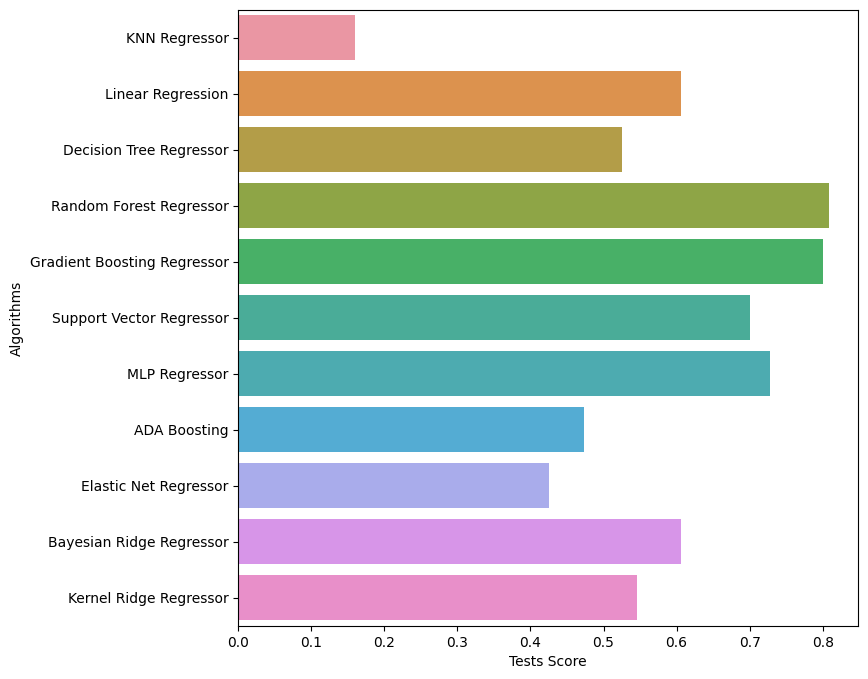

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sb.barplot(x = "Tests Score", y = "Algorithms", data = compare_models)
plt.show()

Goal : Finding the best parameters for Gradient Boosting Regressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

max_depth = [0] * 32
scores = [0] * 32

for i in range (1,33):
    gb = GradientBoostingRegressor(random_state=69, max_depth=i)
    gb.fit(X_train, Y_train)
    g1 = gb.score(X_train, Y_train)
    g2 = gb.score(X_test, Y_test)
    max_depth[i - 1] = i
    scores[i-1] = g2

compare_models2 = pd.DataFrame({ "Max Depth": max_depth, "Tests Score": scores })
compare_models2.sort_values(by = "Tests Score", ascending = False)

,Max Depth,Tests Score
8,9,0.833686
7,8,0.832205
9,10,0.829694
6,7,0.828985
10,11,0.823771
5,6,0.822390
11,12,0.815911
4,5,0.812967
12,13,0.807548
13,14,0.801780


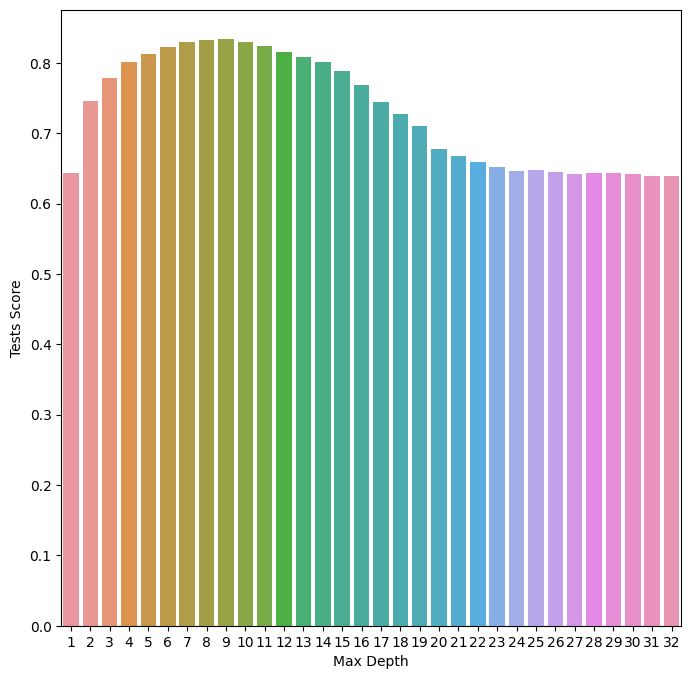

In [101]:
plt.figure(figsize=(8,8))
sb.barplot(x = "Max Depth", y = "Tests Score", data = compare_models2)
plt.show()

In [85]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
scores = [0] * 6
index = 0
for i in learning_rates:
    gb = GradientBoostingRegressor(random_state=69, learning_rate=i)
    gb.fit(X_train, Y_train)
    g1 = gb.score(X_train, Y_train)
    g2 = gb.score(X_test, Y_test)
    scores[index] = g2
    index = index + 1

compare_models3 = pd.DataFrame({ "Learning Rates": learning_rates, "Tests Score": scores })
compare_models3.sort_values(by = "Tests Score", ascending = False)

,Learning Rates,Tests Score
1,0.50,0.813507
2,0.25,0.806993
3,0.10,0.778222
0,1.00,0.773611
4,0.05,0.745698
5,0.01,0.502855


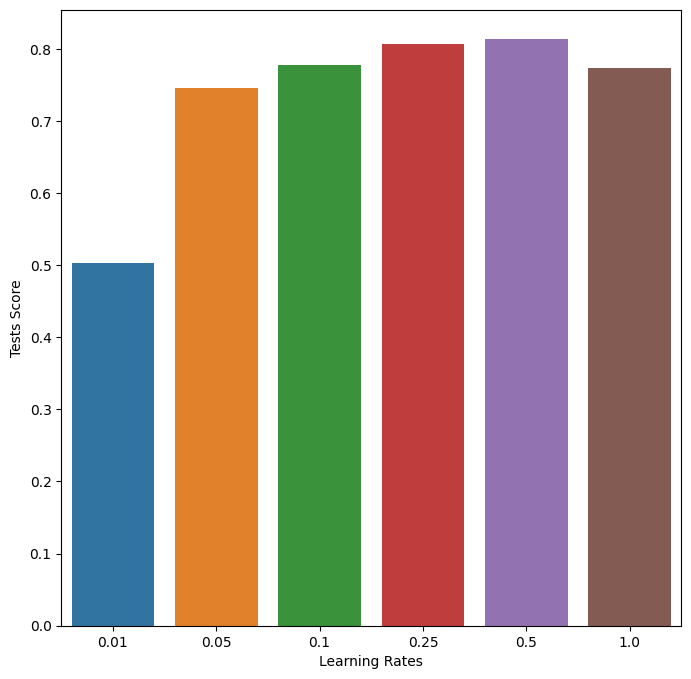

In [86]:
plt.figure(figsize=(8,8))
sb.barplot(y = "Tests Score", x = "Learning Rates", data = compare_models3)
plt.show()

In [75]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000, 2000, 5000]
scores = [0] * 13
index = 0
for i in n_estimators:
    gb = GradientBoostingRegressor(random_state=69, n_estimators=i)
    gb.fit(X_train, Y_train)
    g1 = gb.score(X_train, Y_train)
    g2 = gb.score(X_test, Y_test)
    scores[index] = g2
    index = index + 1

compare_models4 = pd.DataFrame({ "N Estimators": n_estimators, "Tests Score": scores })
compare_models4.sort_values(by = "Tests Score", ascending = False)

,N Estimators,Tests Score
12,5000,0.832118
11,2000,0.832066
10,1000,0.828662
9,500,0.819932
8,200,0.799017
7,100,0.778222
6,64,0.759203
5,32,0.709738
4,16,0.598203
3,8,0.465814


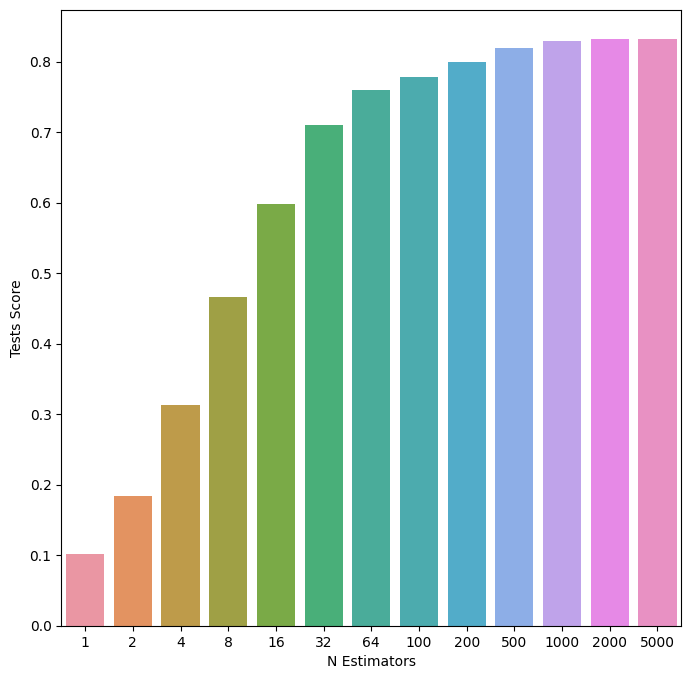

In [76]:
plt.figure(figsize=(8,8))
sb.barplot(y = "Tests Score", x = "N Estimators", data = compare_models4)
plt.show()

In [80]:
gb = GradientBoostingRegressor(random_state=69, max_depth=9, n_estimators=5000, learning_rate=0.5)
gb.fit(X_train, Y_train)
g1 = gb.score(X_train, Y_train)
g2 = gb.score(X_test, Y_test)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 1.000
R^2 of Gradient Boosting Regressor on test set: 0.782


In [94]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
scores = [0] * 6
index = 0
for i in learning_rates:
    gb = GradientBoostingRegressor(random_state=69, learning_rate=i, max_depth=9)
    gb.fit(X_train, Y_train)
    g1 = gb.score(X_train, Y_train)
    g2 = gb.score(X_test, Y_test)
    scores[index] = g2
    index = index + 1

compare_models5 = pd.DataFrame({ "Learning Rates": learning_rates, "Tests Score": scores })
compare_models5.sort_values(by = "Tests Score", ascending = False)

,Learning Rates,Tests Score
3,0.10,0.833686
4,0.05,0.826962
2,0.25,0.823650
1,0.50,0.782450
5,0.01,0.669370
0,1.00,0.641177


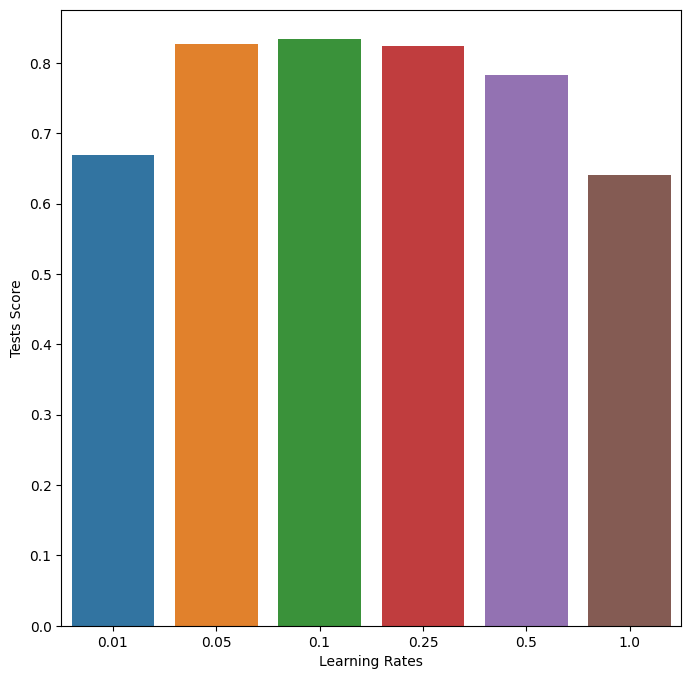

In [95]:
plt.figure(figsize=(8,8))
sb.barplot(y = "Tests Score", x = "Learning Rates", data = compare_models5)
plt.show()

In [96]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000, 2000, 5000]
scores = [0] * 13
index = 0
for i in n_estimators:
    gb = GradientBoostingRegressor(random_state=69, n_estimators=i, learning_rate=0.1, max_depth=9)
    gb.fit(X_train, Y_train)
    g1 = gb.score(X_train, Y_train)
    g2 = gb.score(X_test, Y_test)
    scores[index] = g2
    index = index + 1

compare_models6 = pd.DataFrame({ "N Estimators": n_estimators, "Tests Score": scores })
compare_models6.sort_values(by = "Tests Score", ascending = False)

,N Estimators,Tests Score
11,2000,0.838576
12,5000,0.838575
10,1000,0.838528
9,500,0.838279
8,200,0.836285
7,100,0.833686
6,64,0.829653
5,32,0.811615
4,16,0.757333
3,8,0.622869


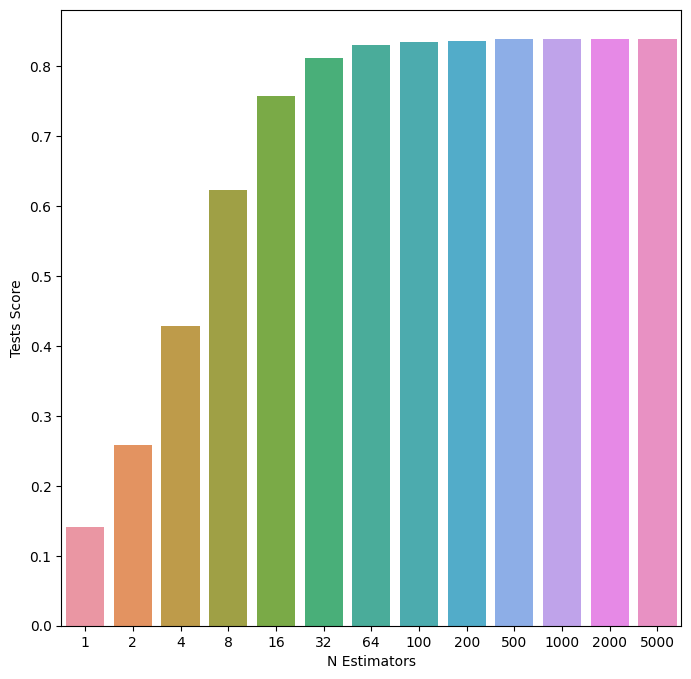

In [97]:
plt.figure(figsize=(8,8))
sb.barplot(y = "Tests Score", x = "N Estimators", data = compare_models6)
plt.show()

In [98]:
gb = GradientBoostingRegressor(random_state=69, max_depth=9, learning_rate=0.1, n_estimators=2000)
gb.fit(X_train, Y_train)
g1 = gb.score(X_train, Y_train)
g2 = gb.score(X_test, Y_test)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 1.000
R^2 of Gradient Boosting Regressor on test set: 0.839


In [ ]:
max_depth = [0] * 32
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000, 2000, 5000]
best_score = 0
best_max_depth = 0
best_learning_rate = 0
best_n_estimator = 0

for i in range(1,33):
    max_depth[i-1] = i
    for j in learning_rates:
        for n in n_estimators:
            gb = GradientBoostingRegressor(random_state=69, max_depth=i, learning_rate=j, n_estimators=n)
            gb.fit(X_train, Y_train)
            g1 = gb.score(X_train, Y_train)
            g2 = gb.score(X_test, Y_test)
            if (g2 > best_score):
                best_score = g2
                best_max_depth = i
                best_learning_rate = j
                best_n_estimator = n
            

print("R^2 of Gradient Boosting Regressor on test set with best parameters: {:.3f}".format(best_score))
print("Best Max Depth on test set: {:.0f}".format(best_max_depth))
print("Best Learning Rate on test set: {:.2f}".format(best_learning_rate))
print("Best N Estimators on test set: {:.0f}".format(best_n_estimator))